# Product Sales Forecasting

## 1.Introduction

Name : Muhamad Bagus Septian

Project Description : This project is part of hacktiv8 talent fair chalenge. In this project I'm going to solve a problem proposed from Kalbe data. The data that's been presented consist of product sales data from multiple category. To solve the problem I'm gonna build a machine learning model to forecast each product sales to get an idea which product sales perform the best

## 2.Import Libraries

In [1]:
# Basic library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For date manipulation
from datetime import datetime, timedelta

# Seasonal and trend analysis
from statsmodels.tsa.seasonal import seasonal_decompose

from scipy.stats import f_oneway

# Forecasting model
from pmdarima.arima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Model Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## 3.Data Loading

In [2]:
df_A1 = pd.read_excel('kalbe_data.xlsx', sheet_name='A1')
df_A2 = pd.read_excel('kalbe_data.xlsx', sheet_name='A2')
df_B1 = pd.read_excel('kalbe_data.xlsx', sheet_name='B1')
df_B2 = pd.read_excel('kalbe_data.xlsx', sheet_name='B2')

### 3.1 Data Overview

#### 3.1.1 Data Overview A1

In [3]:
# Dataset preview
df_A1.head()

,Day,Category,Product,Sales
0,1,A,A1,100.000000
1,2,A,A1,101.000000
2,3,A,A1,102.010000
3,4,A,A1,103.030100
4,5,A,A1,104.060401


In [4]:
# Dataset preview
df_A1.tail()

,Day,Category,Product,Sales
85,86,A,A1,196.980000
86,87,A,A1,197.964900
87,88,A,A1,198.954724
88,89,A,A1,199.949498
89,90,A,A1,200.949246


In [5]:
# Checking dataset info
df_A1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Day       90 non-null     int64  
 1   Category  90 non-null     object 
 2   Product   90 non-null     object 
 3   Sales     90 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.9+ KB


* The dataset for A1 consist of 4 columns and 90 rows
* There are 2 numerical columns (Day & Sales) and 2 Categorical Columns (Category & Product)
* There are no missing value in the dataset.

#### 3.1.2 Data Overview A2

In [6]:
# Dataset preview
df_A2.head()

,Day,Category,Product,Sales
0,1,A,A2,1000.000000
1,2,A,A2,1005.000000
2,3,A,A2,1010.025000
3,4,A,A2,1015.075125
4,5,A,A2,1020.150501


In [7]:
# Dataset preview
df_A2.tail()

,Day,Category,Product,Sales
85,86,A,A2,1527.971484
86,87,A,A2,1535.611342
87,88,A,A2,1543.289398
88,89,A,A2,1551.005845
89,90,A,A2,1558.760875


In [8]:
# Checking dataset info
df_A2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Day       90 non-null     int64  
 1   Category  90 non-null     object 
 2   Product   90 non-null     object 
 3   Sales     90 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.9+ KB


* This dataset hase similar composition as the A1 dataset with 4 columns and 90 rows
* This dataset also has 2 numerical columns (Day & Sales) and 2 Categorical Columns (Category & Product)
* There are no missing value in A2 dataset.

### 3.1.3 Data Overview B1

In [9]:
# Dataset preview
df_B1.head()

,Day,Category,Product,Sales,Event
0,1,B,B1,990.0,0
1,2,B,B1,980.0,0
2,3,B,B1,1010.0,0
3,4,B,B1,1010.0,0
4,5,B,B1,1000.0,0


In [10]:
# Dataset preview
df_B1.tail()

,Day,Category,Product,Sales,Event
99,100,B,B1,NaN,0
100,101,B,B1,NaN,1
101,102,B,B1,NaN,0
102,103,B,B1,NaN,0
103,104,B,B1,NaN,0


In [11]:
# Checking dataset info
df_B1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Day       104 non-null    int64  
 1   Category  104 non-null    object 
 2   Product   104 non-null    object 
 3   Sales     90 non-null     float64
 4   Event     104 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 4.2+ KB


* The dataset consist of 5 columns and 104 rows
* There are 2 numerical columns (Day & Sales) 
* There are 14 missing values in Sales column

### 3.1.4 Data Overview B2

In [12]:
# Dataset preview
df_B2.head()

,Day,Category,Product,Sales
0,1,B,B2,NaN
1,2,B,B2,NaN
2,3,B,B2,NaN
3,4,B,B2,NaN
4,5,B,B2,NaN


In [13]:
# Dataset preview
df_B2.tail()

,Day,Category,Product,Sales
99,100,B,B2,NaN
100,101,B,B2,NaN
101,102,B,B2,NaN
102,103,B,B2,NaN
103,104,B,B2,NaN


In [14]:
# Checking dataset info
df_B2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Day       104 non-null    int64  
 1   Category  104 non-null    object 
 2   Product   104 non-null    object 
 3   Sales     30 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.4+ KB


* The dataset consist with 4 columns and 90 rows
* This dataset has 2 numerical columns (Day & Sales) and 2 Categorical Columns (Category & Product)
* There are 74 missing values in Sales column

### 3.2 Data Cleaning & Preparation

### 3.2.1 Handling Missingg Values

From the data preview we found that there are missing values in Sales column for both B1 and B2. We will further investigate this missing  value pattern by using a simple visualization plot.

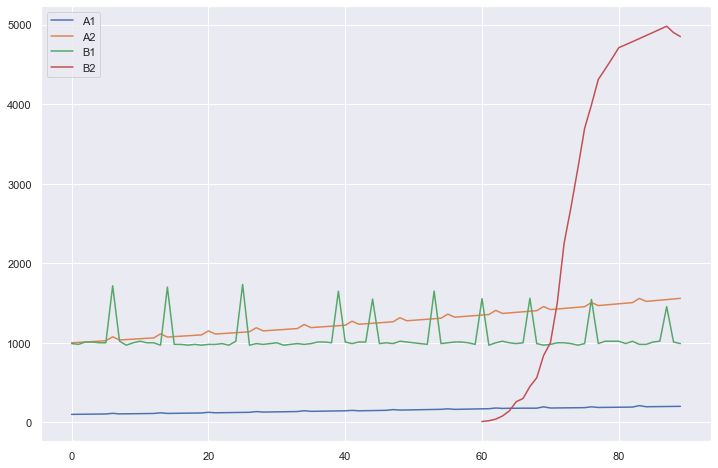

In [15]:
sns.set()
df_A1['Sales'].plot(figsize=(12,8))
df_A2['Sales'].plot(figsize=(12,8))
df_B1['Sales'].plot(figsize=(12,8))
df_B2['Sales'].plot(figsize=(12,8))
plt.legend(['A1', 'A2', 'B1', 'B2'])
plt.show()

We can see that all the line chart from every dataset stop at the same place. This could means that all the dataset last recorded sales end at day 90. Missing value in B1 and B2 past day 90 might happen because the sales haven't been recorded yet. Moreover we can also see that sales for B2 start at day 60 from 0. So that might mean that before day 60 there are no B2 product being sold. Based on the founding of our investigation about B1 and B2 missing value there are a couple of ways to be used to handle the missing value. FIrst we are going to use imputation with backward interpolation. Second we are going to drop everything past day 90 to create uniformity between each dataset.

In [16]:
df_B2['Sales'] = df_B2['Sales'].interpolate(limit_direction="backward")

In [17]:
df_B1.dropna(inplace=True)
df_B2.dropna(inplace=True)

#### 3.2.2 Column Adjusting

In this project we are going to build a machine learnig models for forecasting sales. In order to make a forecasting model we are going to need a datetime column as an index. So we are going to add a date time column and setting it as an Index. For the date range we are going to use today's date as the end date and the start date would be the previos date based on the length of the days in each dataset.

In [18]:
# Frist we are going to define a fucntion that will give us list of dates for each dataset
def list_date(data):
    # We are going to define the end date with today's date
    today = datetime.now()
    # We also going to define the number of previos date based on the length of each dataset
    n_days = len(data) -1
    # Defining start date as the date difference between today and n_days
    start_date = today - timedelta(n_days)
    # Creating empty dataframe for the list of dates
    date_range = pd.DataFrame()
    # Generating list of dates
    date = pd.date_range(start=start_date, end=today)
    # Inputting the list of dates to the empty dataframe
    date_range = pd.DataFrame(date, columns=['Date'])
    # Converting the listt of dates format to date-month-year
    date_range['Date'] = pd.to_datetime(date_range['Date']).dt.floor('D')
    return date_range

In [19]:
# Generating list of dates for dataset A1
date_range_A1 = list_date(df_A1)

# Generating list of dates for dataset A2
date_range_A2 = list_date(df_A2)

# Generating list of dates for dataset B1
date_range_B1 = list_date(df_B1)

# Generating list of dates for dataset B2
date_range_B2 = list_date(df_B2)

In [20]:
# Preview of list of dates result
date_range_A1.head()

,Date
0,2022-11-24
1,2022-11-25
2,2022-11-26
3,2022-11-27
4,2022-11-28


Now that we have generated the list of dates foe each dataset we will merge them into each dataset and set the date as an index.

In [21]:
# First we are going to define a function to cancatenate the dataset 
def add_datetime_index(data, date):
    # Concatenate the dataset and list of dates
    concat = pd.concat([data, date], axis=1)
    # Setting the date in the dataset as an index
    concat.set_index('Date', inplace=True)
    return concat

In [22]:
# Concatenating date with dataset and setting it as an index for dataset A1
df_A1 = add_datetime_index(df_A1, date_range_A1)

# Concatenating date with dataset and setting it as an index for dataset A2
df_A2 = add_datetime_index(df_A2, date_range_A2)

# Concatenating date with dataset and setting it as an index for dataset B1
df_B1 = add_datetime_index(df_B1, date_range_B1)

# Concatenating date with dataset and setting it as an index for dataset B2
df_B2 = add_datetime_index(df_B2, date_range_B2)

In [23]:
# Preview of dataset after adjustment
df_A1.head()

,Day,Category,Product,Sales
Date,,,,
2022-11-24,1,A,A1,100.000000
2022-11-25,2,A,A1,101.000000
2022-11-26,3,A,A1,102.010000
2022-11-27,4,A,A1,103.030100
2022-11-28,5,A,A1,104.060401


## 4.Exploratory Data Analysis

### 4.1 Product A1 EDA

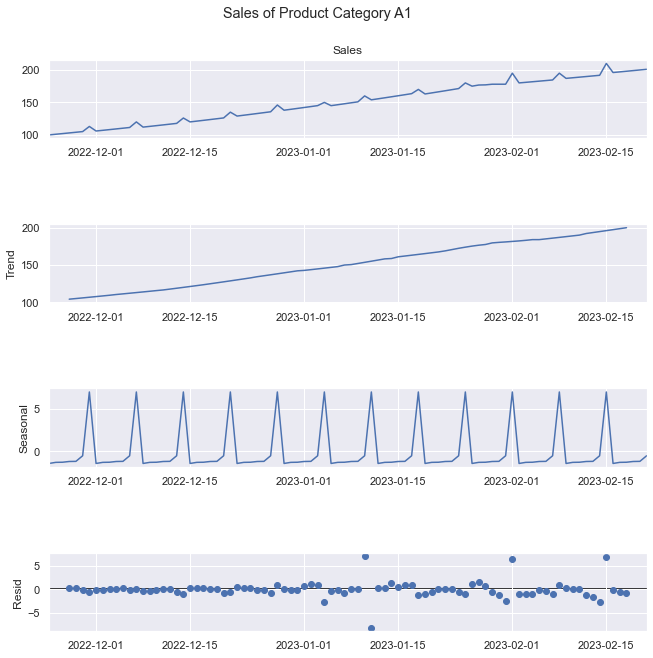

Sales A1 mean = 150.81929754225288
Sales A1 std = 31.200697580714866


In [24]:
# Defining the sales data for plotting
sales_A1 = df_A1['Sales']

# Create a visualization for sales trend
sns.set()
seasonal_A1 = seasonal_decompose(sales_A1, model='additive')
fig1 = seasonal_A1.plot()
fig1.set_size_inches((10, 10))
plt.suptitle('Sales of Product Category A1')
plt.show()

print('Sales A1 mean =',sales_A1.mean())
print('Sales A1 std =',sales_A1.std())

Product A1 has an increasing trend for the whole 90 days. The average product sold are 151 goods, with 31 sales difference every day. The A1 sales also shows seasonality with a some increas and decrease every few days.

### 4.2 Product A2 EDA

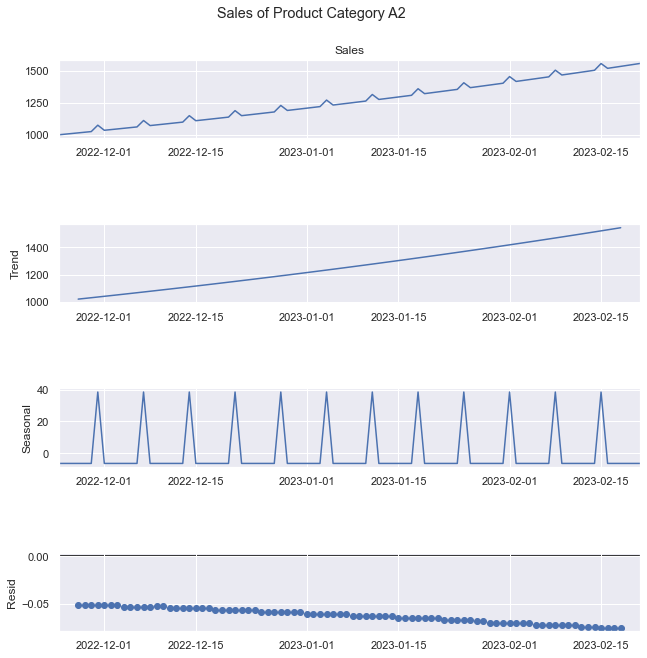

Sales A2 mean = 1265.0103977426058
Sales A2 std = 164.44047118410532


In [25]:
# Defining the sales data for plotting
sales_A2 = df_A2['Sales']

# Create a visualization for sales trend
sns.set()
seasonal_A2 = seasonal_decompose(sales_A2, model='additive')
fig2 = seasonal_A2.plot()
fig2.set_size_inches((10, 10))
plt.suptitle('Sales of Product Category A2')
plt.show()

print('Sales A2 mean =',sales_A2.mean())
print('Sales A2 std =',sales_A2.std())

Produt A2 shows similar increasing trend as A1, but overall sales of A2 shows much larger produt sold with average of 1265 and standard deviation in each day of 164. We can also found seasonality in product A2

### 4.3 Product B1 EDA

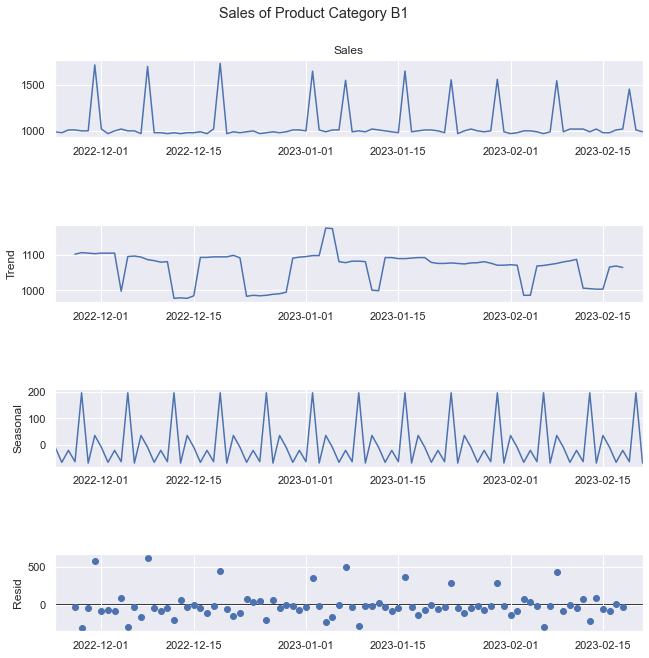

Sales B1 mean = 1063.0555555555557
Sales B1 std = 197.69687164615596


In [26]:
# Create a visualization for sales trend
sales_B1 = df_B1['Sales']

# Create a visualization for sales trend
sns.set()
seasonal_B1 = seasonal_decompose(sales_B1, model='additive')
fig_B1 = seasonal_B1.plot()
fig_B1.set_size_inches((10, 10))
plt.suptitle('Sales of Product Category B1')
plt.show()

print('Sales B1 mean =',sales_B1.mean())
print('Sales B1 std =',sales_B1.std())

Product B1 trend are irregular and doesn't shows a certain pattern. The average product sold are 1063 with standard deviation of 197. B1 also shows seasonality every few days.

### 4.4 Product B2 EDA

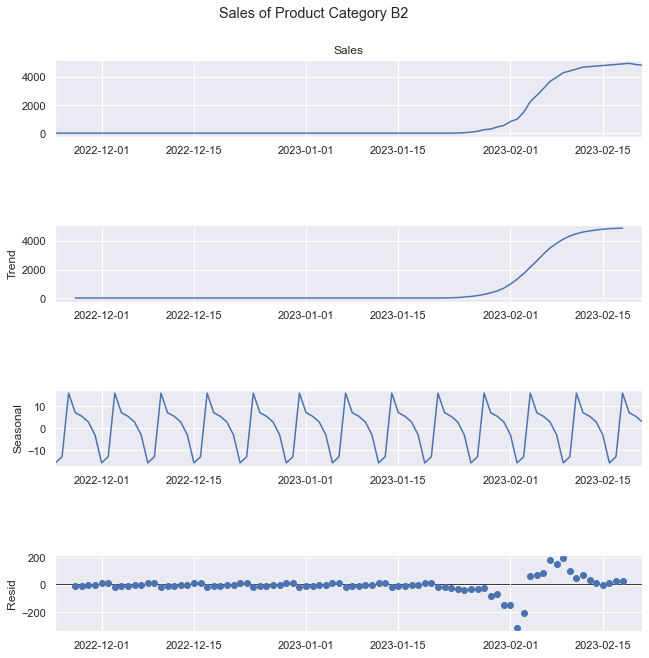

Sales B2 mean = 927.2919086200284
Sales B2 std = 1754.375542131209


In [27]:
# Create a visualization for sales trend
sales_B2 = df_B2['Sales']

# Create a visualization for sales trend
sns.set()
seasonal_B2 = seasonal_decompose(sales_B2, model='additive')
fig_B2 = seasonal_B2.plot()
fig_B2.set_size_inches((10, 10))
plt.suptitle('Sales of Product Category B2')
plt.show()

print('Sales B2 mean =',sales_B2.mean())
print('Sales B2 std =',sales_B2.std())

Product B2 sales trend shows increase at the end of 90 days period. This is because the product sales recorded only start from 30 days ago. Compared to other product sales, B2 has the most increase in the span of 30 days. The average product sold in the period are 927. The standard deviation are really high because there are a huge increase of sales in the last 30 days. The product might be quite popular with the customer.

### 4.5 Inferential Analysis

We are going to look at the average sales of each product and compare it with each other to see whether there are significant difference beetween each product sales.

In [28]:
print("Average of A1",sales_A1.mean())
print("Average of A2",sales_A2.mean())
print("Average of B1",sales_B1.mean())
print("Average of B2",sales_B2.mean())

Average of A1 150.81929754225288
Average of A2 1265.0103977426058
Average of B1 1063.0555555555557
Average of B2 927.2919086200284


The hypothesis testing we are going to do are as follows

H0 = There are no difference between A1, A2, B1 and B2
H1 = There are difference between A1, A2, B1 and B2

In [29]:
# Hypothesis testing with ANOVA
f_stat,p_value = f_oneway(sales_A1, sales_A2, sales_B1, sales_B2)
print('P-value:', p_value)

P-value: 7.473937106482581e-16


The result of ANOVA test shows p < 0.5, therefore H0 is rejected. We can conclude that there are significant statistical difference between each product sales.

## 5.Data Preprocessing

### 5.1 Splitting Train and Test Data

For this project the requirement are to make a model that can make a forecast for 14 days with the highest accuracy as possible. Therefore we are going to take the last 14 days as test data and the day before that will be used as training data.

In [30]:
# Defining test length
test_length = len(df_A1)-14

# Splitting train and test for A1
train_A1 = sales_A1.iloc[:test_length]
test_A1 = sales_A1.iloc[test_length:]

# Splitting train and test for A2
train_A2= sales_A2.iloc[:test_length]
test_A2 = sales_A2.iloc[test_length:]

# Splitting train and test for B1
train_B1 = sales_B1.iloc[:test_length]
test_B1 = sales_B1.iloc[test_length:]

# Splitting train and test for B2
train_B2 = sales_B2.iloc[:test_length]
test_B2 = sales_B2.iloc[test_length:]

## 6.Model Definition

The model that are going to be used as forecasting model are Sarimax model. Sarimax model is chosen because it's simplicity and because the dataset presented aren't big dataset. Therefore it doesn't need complex model. Hence it is chosen for the sake of efficiency.

To find the best parameter for the model we are going to use the auto arima module from statsmodel to do auto search for the parameter. 
The 

### 6.1 Search Best Model for A1

In [31]:
# Search best model for A1
auto_arima_A1 = auto_arima(sales_A1, start_p=1, d=1, start_q=1, maxp=7, max_q=7, 
                           max_d=7, m=7,
                           start_P=0, D=1, start_Q=0, max_P=7, max_D=7, maxQ=7,
                           error_action='ignore', n_fits=100)

In [32]:
# View best model for A1
auto_arima_A1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   90
Model:             SARIMAX(0, 1, 2)x(1, 1, [], 7)   Log Likelihood                -182.500
Date:                            Tue, 21 Feb 2023   AIC                            372.999
Time:                                    17:00:14   BIC                            382.626
Sample:                                11-24-2022   HQIC                           376.864
                                     - 02-21-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9005      0.076    -11.918      0.000      -1.049      -0.752
ma.L2          0.2695      0.114      2.372      0.018       0.047       0.492
ar.S.L7       -0.4488      0.075     -5.967      0.000      -0.596      -0.301
sigma2         4.8742      0.548      8.902      0.000       3.801       5.947
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                28.36
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):              10.23   Skew:                             0.46
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The best parameter for A1 are = order=(0,1,2), seasonal_order=(1,1,0,7)

### 6.2 Search Best Model for A2

In [33]:
# Search best model for A2
auto_arima_A2 = auto_arima(sales_A2, start_p=1, d=1, start_q=1, maxp=7, max_q=7, 
                           max_d=7, m=7,
                           start_P=0, D=1, start_Q=0, max_P=7, max_D=7, maxQ=7,
                           error_action='ignore', n_fits=100)

In [34]:
# View best model for A1
auto_arima_A2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                   90
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood                 519.650
Date:                           Tue, 21 Feb 2023   AIC                          -1029.300
Time:                                   17:00:41   BIC                          -1017.267
Sample:                               11-24-2022   HQIC                         -1024.469
                                    - 02-21-2023                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9589      0.018     52.953      0.000       0.923       0.994
ma.L1          0.9340      0.000   4040.818      0.000       0.934       0.934
ar.S.L7        0.9460      0.037     25.533      0.000       0.873       1.019
ma.S.L7        0.9098      0.000   2341.925      0.000       0.909       0.911
sigma2       1.03e-07   2.39e-08      4.303      0.000    5.61e-08     1.5e-07
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             18975.53
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               0.42   Skew:                             8.51
Prob(H) (two-sided):                  0.03   Kurtosis:                        75.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.13e+19. Standard errors may be unstable.
"""

The best parameter for A2 are = order=(2,1,1), seasonal_order=(1,1,0,7)

### 6.2 Search Best Model for B1

In [35]:
# Search best model for B1
auto_arima_B1 = auto_arima(sales_B1, start_p=1, d=1, start_q=1, maxp=7, max_q=7, 
                           max_d=7, m=7,
                           start_P=0, D=1, start_Q=0, max_P=7, max_D=7, maxQ=7,
                           error_action='ignore', n_fits=100)

In [36]:
# View best model for B1
auto_arima_B1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   90
Model:             SARIMAX(3, 1, 0)x(1, 1, [1], 7)   Log Likelihood                -566.451
Date:                             Tue, 21 Feb 2023   AIC                           1144.902
Time:                                     17:00:57   BIC                           1159.343
Sample:                                 11-24-2022   HQIC                          1150.700
                                      - 02-21-2023                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7082      0.120     -5.888      0.000      -0.944      -0.472
ar.L2         -0.5648      0.153     -3.685      0.000      -0.865      -0.264
ar.L3         -0.2937      0.163     -1.805      0.071      -0.613       0.025
ar.S.L7       -0.3754      0.144     -2.608      0.009      -0.658      -0.093
ma.S.L7       -0.4483      0.174     -2.579      0.010      -0.789      -0.108
sigma2      5.639e+04   6892.013      8.182      0.000    4.29e+04    6.99e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.55   Jarque-Bera (JB):                29.68
Prob(Q):                              0.46   Prob(JB):                         0.00
Heteroskedasticity (H):               0.66   Skew:                             0.86
Prob(H) (two-sided):                  0.28   Kurtosis:                         5.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The best parameter for B1 are = order=(3,1,0), seasonal_order=(1,1,1,7)

### 6.2 Search Best Model for B2

In [37]:
# Search best model for B2
auto_arima_B2 = auto_arima(sales_B2, start_p=1, d=1, start_q=1, maxp=7, max_q=7, 
                           max_d=7, m=7,
                           start_P=0, D=1, start_Q=0, max_P=7, max_D=7, maxQ=7,
                           error_action='ignore', n_fits=100)

In [38]:
# Search best model for B2
auto_arima_B2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   90
Model:             SARIMAX(1, 1, 0)x(2, 1, [1], 7)   Log Likelihood                -472.728
Date:                             Tue, 21 Feb 2023   AIC                            955.456
Time:                                     17:01:13   BIC                            967.489
Sample:                                 11-24-2022   HQIC                           960.287
                                      - 02-21-2023                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8877      0.024     37.619      0.000       0.841       0.934
ar.S.L7       -0.1972      0.400     -0.493      0.622      -0.982       0.587
ar.S.L14      -0.1907      0.751     -0.254      0.800      -1.663       1.282
ma.S.L7       -0.8035      0.482     -1.666      0.096      -1.749       0.142
sigma2      5165.4532    448.960     11.505      0.000    4285.508    6045.398
===================================================================================
Ljung-Box (L1) (Q):                   2.60   Jarque-Bera (JB):               407.34
Prob(Q):                              0.11   Prob(JB):                         0.00
Heteroskedasticity (H):        40894606.49   Skew:                             1.79
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The best parameter for B1 are = order=(1,1,0), seasonal_order=(2,1,1,7)

## 7.Model Training

In [39]:
forecasting_A1 = SARIMAX(train_A1, order=(0,1,2), seasonal_order=(1,1,0,7)).fit()

In [40]:
forecasting_A2 = SARIMAX(train_A2, order=(2,1,1), seasonal_order=(1,1,0,7)).fit()

In [41]:
forecasting_B1 = SARIMAX(train_B1, order=(3,1,0), seasonal_order=(1,1,1,7)).fit()

In [42]:
forecasting_B2 = SARIMAX(train_B2, order=(1,1,0), seasonal_order=(2,1,1,7)).fit()

## 8.Model Evaluation

Model evaluation will be done by comparing the predicted value with the actual value of sales for each product category. The metric that are going to be used to evaluate the model are MAE and RSME. MAE are metric that calculate the average off difference between predicted data and actual data, the closer the error to zero the better the mmodel prediction accuracy. RMSE are a root of MSE, which also calculate the error but more easily interpreted compared to normal MSE.

### 8.1 Forecasting A1 Evaluation



In [43]:
# Defining date range for test forecasting
start_test_index = len(train_A1)
end_test_index = len(df_A1)-1

In [44]:
# Forecasting A1 sales
pred_test_A1 = forecasting_A1.predict(start_test_index, end_test_index, dynamic=True)
pred_test_A1 = pd.DataFrame(pred_test_A1)
pred_test_A1.columns = ['Sales_predict']

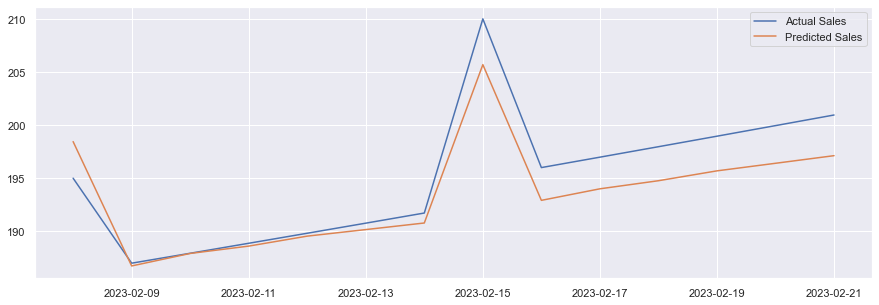

MAE test =  2.1439894727089177
MSE test =  7.0293590161568975
RMSE test =  2.6512938381395785


In [45]:
# Visualizing prediction
plt.figure(figsize=(15, 5))
plt.plot(test_A1)
plt.plot(pred_test_A1)
plt.legend(['Actual Sales', 'Predicted Sales'])
plt.show()

print('MAE test = ', mean_absolute_error(test_A1, pred_test_A1))
print('MSE test = ', mean_squared_error(test_A1, pred_test_A1))
print('RMSE test = ', np.sqrt(mean_squared_error(test_A1, pred_test_A1)))

The forecating error for A1 are quite small with MAE and RMSE score of 2. The visualization plot also shows that the forecasting are quite similar to the actual sales. We can conclude that model forecasting A1 has great accuracy in forecasting A1 sales.

### Forecasting A2 Evaluation

In [46]:
# Forecasting A2 sales
pred_test_A2 = forecasting_A2.predict(start_test_index, end_test_index, dynamic=True)
pred_test_A2 = pd.DataFrame(pred_test_A2)
pred_test_A2.columns = ['Sales_predict']

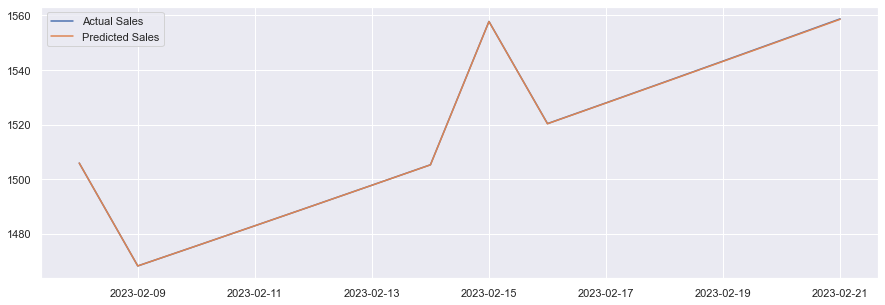

MAE test =  0.05088699129086243
MSE test =  0.004875505061864889
RMSE test =  0.0698248169483092


In [47]:
# Visualizing prediction
plt.figure(figsize=(15, 5))
plt.plot(test_A2)
plt.plot(pred_test_A2)
plt.legend(['Actual Sales', 'Predicted Sales'])
plt.show()

print('MAE test = ', mean_absolute_error(test_A2, pred_test_A2))
print('MSE test = ', mean_squared_error(test_A2, pred_test_A2))
print('RMSE test = ', np.sqrt(mean_squared_error(test_A2, pred_test_A2)))

The model forecsating A2 has really small MAE and RMSE score that really close to zero. The plot of prediction and actual data also looks almost the same. We can conclude that the model has great accuracy in forecasting A2 sales.

### Forecasting A2 Evaluation

In [48]:
# Forecasting B1 sales
pred_test_B1 = forecasting_B1.predict(start_test_index, end_test_index, dynamic=True)
pred_test_B1 = pd.DataFrame(pred_test_A2)
pred_test_B1.columns = ['Sales_predict']

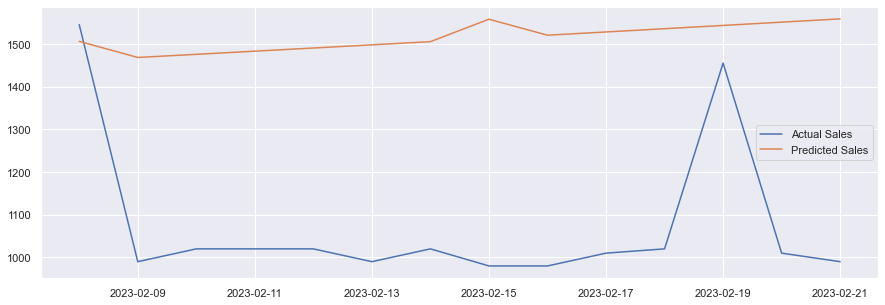

MAE test =  446.3062035193378
MSE test =  224993.2818960354
RMSE test =  474.3345674690338


In [49]:
# Visualizing prediction
plt.figure(figsize=(15, 5))
plt.plot(test_B1)
plt.plot(pred_test_B1)
plt.legend(['Actual Sales', 'Predicted Sales'])
plt.show()

print('MAE test = ', mean_absolute_error(test_B1, pred_test_B1))
print('MSE test = ', mean_squared_error(test_B1, pred_test_B1))
print('RMSE test = ', np.sqrt(mean_squared_error(test_B1, pred_test_B1)))

The predicted model shows error score that are quite large compared to te other two model, with MAE 197 and RMSE 274. The visualization plot also shows the prediction aren't perfectly in line with the actual value. This might be because the irregular trend fluctuaion that present in the sales data. We might need a more powerful model that can handle a complex calculation so that we can predict the sales data with more accuracy.

### Forecasting B1 Evaluation

In [50]:
# Forecasting B2 sales
pred_test_B2 = forecasting_B2.predict(start_test_index, end_test_index, dynamic=True)
pred_test_B2 = pd.DataFrame(pred_test_B2)
pred_test_B2.columns = ['Sales_predict']

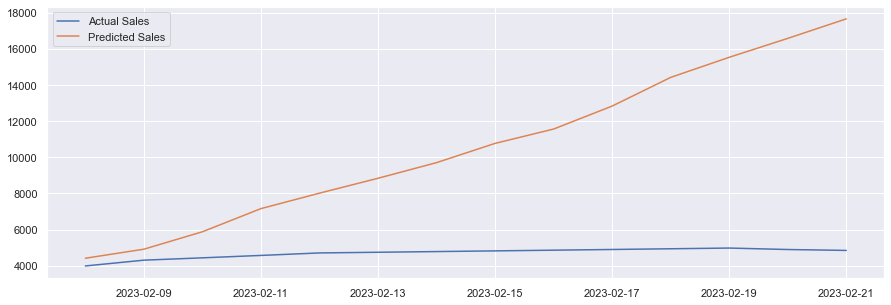

MAE test =  5890.0755688368545
MSE test =  50405278.0471673
RMSE test =  7099.667460322864


In [51]:
# Visualizing prediction
plt.figure(figsize=(15, 5))
plt.plot(test_B2)
plt.plot(pred_test_B2)
plt.legend(['Actual Sales', 'Predicted Sales'])
plt.show()

print('MAE test = ', mean_absolute_error(test_B2, pred_test_B2))
print('MSE test = ', mean_squared_error(test_B2, pred_test_B2))
print('RMSE test = ', np.sqrt(mean_squared_error(test_B2, pred_test_B2)))

The MSE and RMSE score for B2 model forecasting also shows a large amount of error. We can see from the visualization that the forecasting shows an increasing trend, while the actual value are stationary. This might happen because of the way we split the trai and test data. The trend for B2 are increasing at near the end but then it become stagnant. The splitting could be happen before the actual data stagnation therefore we couldn't capture it for the model traaining and the model forecast the sales data to keep increasing.

## Conclusion

* We can see from the dataset that product A1 and A2 has clear increasing trend pattern and seasonality which is why the model forecasting works better. Meanwhile the irregularity of product B1 and the lack of data from B2 causes the model forecasting result to be unfavorable. 
* Product B2 has the largest sales growth among other product. It might be popular with customer since the sales of B2 in the last few days are the highest even when the trend are no longer increasing. It might be good to invest to this product production and marketin to increase the sales even more.
* Product A1 sales are quite low but it's shows consistency and increasing trends. It might be worth to invest more on improving the product.
* Product A2 also shows increasing trends, it could be good to invest more on product improvement or marketing since it's performed quite good.
* Product B1 generally sold quite well compared to the other product. It has stagnat trend but there are seasonaliy where people buy the product more every few days.
* For future improvement on the model we might need more data for B2 sales to be able to build a better forecasting model. We can also use a model that can handle more complex calculation to anticipate data with irregular trend like B1